# Chapter 5. 정규선형모델

## 5.1 연속형 독립변수가 하나인 모델(단순회귀)

### 5.1.1 분석 준비

분석에 필요한 라이브러리를 임포트하고, 표시 자릿수를 지정

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import  seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리
# (공식문서) https://www.statsmodels.org/stable/index.html 
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정 
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 5.1.2 데이터 읽어 들이기와 표시

* 가공의 맥주 매상 데이터

In [2]:
beer = pd.read_csv("py_source/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


* 데이터를 읽어 들이고 나서 제일 먼저 할 일은 그래프를 그리는 것

* 그래프를 그리면 데이터의 특징을 알 수 있음

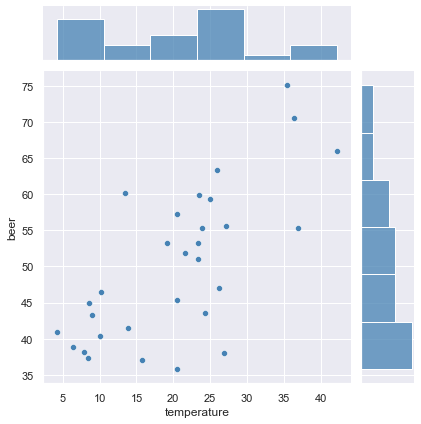

In [3]:
sns.jointplot(x = "temperature", y = "beer", data = beer, color = 'steelblue')

### 5.1.3 모델 구축

* 아래와 같은 맥주 매상 모델을 구축

    - $맥주 \, 매상 \sim N \left( \beta_0 + \beta_1 \times 기온, \, \sigma^2 \right )$
    
* 모델 구축 시 장점

    - 현상을 해석할 수 있게 되며,
    
    - 예측이 가능함

### 5.1.4 statsmodels를 이용한 모델링

In [4]:
lm_model = smf.ols(formula = "beer ~ temperature" , data = beer).fit()

* ```statsmodels.formula.api``` (alias로 smf로 지정함)에서 제공하는 ols 함수를 사용

* 모델의 구조를 지정하는 것은 ```formula```, 지정식은 ```종속변수 ~ 독립변수``` 형태인 ```beer ~ temperature```

* 모델에 적용할 데이터는 ```data = beer```로 지정후 ```.fit()```을 호출함으로써 fittig을 실시  

### 5.1.5 추정 결과 표시와 계수 검정

In [5]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        19:15:45   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Durbin-Watson: 잔차 자기상관성 (d ~ 2 : 잔차끼리 상관관계를 가지지 않는다. d ~ 0: 양의 상관관계, d ~ 4: 음의 상관관계)

* Jarque-Bera: 잔차 정규성 (H0 : 정규분포)

* coef : 모델의 계수값 ($\beta_0$ , $\beta_1$)

* 왼쪽부터 순서대로 계수의 표준오차, t값, 계수의 값이 0이라는 귀무가설에 대한 p 값, 95% 신뢰구간에서 하측신뢰한계와 상측신뢰한계

### 5.1.6 summary 함수의 출력 내용 설명

* **Dep.Variable** : 종속변수의 이름. Dep은 Depended의 약자. 종속변수라는 의미

* **Model, Method** : OLS(Ordinary Least Squares, 범용최소제곱법) 사용했다는 설명

* **Date, Time** : 모델을 추정한 일시

* **No.Observations** : 샘플사이즈

* **Df Residuals** : 샘플사이즈에서 추정된 파라미터수를 뺀 것

* **DF Model** : 사용된 독립변수의 수

* **Covariance Type** : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 된다.

* **R-squared, Adj.R-squared** : 결정계수와 자유도 조정이 끝난 결정계수

* **F-statistic, Prob(F-statistic) : 분산분석 결과** , 분산분석은 5.2절 참조

* **Log-Likelihood** : 최대로그우도

* **AIC** : 아카이케 정보 기준

* **BIC** : 베이즈 정보 기준. 정보 기준의 일종이지만 현재 본 서에서는 사용하지 않음. 세세한 부분은 사용하는 라이브러리나 버전에 따라 달라질 수 있음. 샘플사이즈, 결정계수, AIC 등을 참조하는 것만으로도 충분














### 5.1.7 AIC를 이용한 모델 선택

* AIC를 이용한 모델 선택

    - 독립변수가 1개 밖에 없기 때문에 Null 모델의 AIC와 기온이라는 독립변수가 들어간 모델의 AIC를 비교
    
    - 1. Null 모델 구축
    
    - 2. 기온 변수 모델 구축 
    
    - 3. 각 모델의 AIC 값 비교

In [6]:
null_model = smf.ols("beer ~ 1" , data = beer).fit()

* Null 모델의 AIC 확인

In [7]:
null_model.aic

227.942

* 독립변수가 있는 모델의 AIC 확인

In [8]:
lm_model.aic

208.909

**(AIC 계산 방법)**

In [9]:
# 추정된 모델의 로그우도 확인
lm_model.llf

-102.455

In [10]:
# 추정된 파라미터 수는 모델에 포함되어 있지 않지만, 
# 사용된 독립변수의 수는 아래 방법으로 확인 가능

lm_model.df_model

1.000

In [11]:
# 실제로 절편도 추정되었기 때문에 여기에 1을 더하면 추정된 파라미터의 수를 구할 수 있음
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.909

**(주의)** R 언어 등 다른 소프트웨어서는 장애모수가 포함되어 AIC가 계산됨. 따라서 다른 소프트웨어나 라이브러리에서 계산된 AIC와의 직접적인 비교는 피해야 함

### 5.1.8 회귀직선

* **회귀직선** 은 모델에 의한 종속변수의 추측값을 직선으로 표시한 것. 

* 종속변수가 연속형 변수일 경우, 전통적으로 회귀라고 부르기 때문에 회귀라는 이름을 사용함

* 비선형모델의 경우에는 **회귀곡선** 이라고도 부름

### 5.1.9 seaborn을 이용한 회귀직선 그래프 그리기

* ```statsmodels```를 사용하지 않아도 회귀직선 그래프를 그릴 수 있음

* ```seaborn```의 ```lmplot``` 함수를 사용

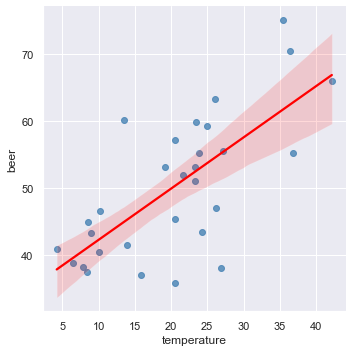

In [12]:
sns.lmplot(x = "temperature", y = "beer", data = beer,
           scatter_kws = {"color" : "steelblue"},
           line_kws = {"color" : "red"})

* 산포도의 디자인은 **```scatter_kws```** 로 지정하고, 회귀직선의 디자인은 **```line_kws```** 로 지정함

* 음영 부분은 회귀직선의 95% 신뢰구간

### 5.1.10 모델을 이용한 예측

* 모델의 계수를 추정할 수 있으므로 이를 사용하면 예측을 할 수 있음

* 이를 위해 추정된 모델에 predict 함수 적용

* 파라미터에 아무것도 넘기지 않으면 훈련 데이터를 사용한 값이 그대로 출력됨

In [13]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

* 기온값을 지정해서 예측할 수도 있음. 파라미터로 데이터프레임을 넘김

In [14]:
# 기온이 0도일 때의 맥주 매상의 기댓값 계산

lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

* 기온이 0도 일때는 $\beta_0$ 값과 같아짐

In [15]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

* Intercept 값과 0도 일때 예측값이 일치함

* 기온이 20도 일때 맥주 매상의 기댓값 계산

In [16]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

* 이 값은 $\beta_0 + \beta_1 \times 20 $의 계산 결과와 같음

* 아래 실제 식에 대입하여 검사을 실시함

In [17]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.919

### 5.1.11 잔차 계산

* 모델의 평가 방법은 주로 잔차를 체크해서 실시함

* 정규선형모델의 경우에는 **```잔차가 '평균이 0인 정규분포'를 따르는 것```** 이므로 모델이 그 분포를 따르고 있는지 체크하게 됨

* 잔차는 다음과 같이 계산함

In [18]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

* 잔차의 계산식에 따른 잔차 계산 


$$ residuals = y - \hat{y} $$

In [19]:
# 예측값: lm_model.fittedvalues나 lm_model.predict() 값
y_hat1 = lm_model.fittedvalues
y_hat2 = lm_model.predict()
y_hat3 = beta0 + beta1 * beer.temperature

In [20]:
np.array(y_hat1 == y_hat3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [21]:
y_hat2 == np.array(y_hat1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [22]:
y_hat2 == np.array(y_hat3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

* 실제값에서 예측값을 빼면 잔차가 됨

In [23]:
(beer.beer - y_hat3).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

### 5.1.12 결정계수

* summary 함수의 출력에 있는 R-squared는 결정계수라 불리는 지표

* 결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표

* 결정계수를 나타내는 식

    * **SST(Total Sum of Squares)** : 관측값에서 관측값의 평균(혹은 추정치의 평균)을 뺀 결과의 총합
    
    * **SSE(Explained Sum of Squares)** : 추정값에서 관측값의 평균(혹은 추정치의 평균)을 뺀 결과의 총합
    
    * **SSR(Residual Sum of Squares)** : 관측값에서 추정값을 뺀 잔차의 총합
    
    
$$  R^{2} = \frac{SSE}{SST} \, \quad = \frac{SSR}{SST} $$

$$ = \frac{\sum_{i=1}^{N} \left( \hat{y} - \mu \right)^2}{\sum_{i=1}^{N} \left( y - \mu \right)^2} \,  = \frac{\sum_{i=1}^{N} \left( y - \hat{y} \right)^2}{\sum_{i=1}^{N} \left( y - \mu \right)^2}$$



In [24]:
# 결정계수 계산

mu = np.mean(beer.beer)
y = beer.beer
y_hat = lm_model.predict()

np.sum((y_hat - mu) ** 2) / np.sum((y - mu) ** 2)

0.504

In [25]:
# 도출된 모델에서 결정계수 attr 추출

lm_model.rsquared

0.504

* 결정계수의 정성적 의미는 전체 대비 모델이 설명하는 부분으로 전체 변동폭의 크기 vs 모델로 설명 가능한 변동폭의 비율이라고 해석할 수 있음

* 다음은 잔차를 이용한 결정계수 도출

In [26]:
np.sum((y_hat - mu) ** 2) + sum(resid ** 2)

3277.115

In [27]:
np.sum((y - mu) ** 2)

3277.115

In [28]:
# 잔차를 이용한 결정계수 
# SSR/SST

1 - np.sum(resid ** 2) / np.sum((y - mu) ** 2)

0.504

### 5.1.13 수정된 결정계수

* 독립변수가 늘어나는 것에 패널티를 적용한 결정계수를 **수정된 결정계수(Adjusted R-squared)** 라고 함

* 독립변수의 수가 늘어나면 결정계수는 큰 값이 됨. 즉 독립변수가 늘어날 수록 과적합이 될 수 있으므로 아래와 같이 조정함

* 수정된 결정계수의 식

    * **s** : 독립변수의 수
    
$$ R^2 = \frac{\sum_{i=1}^{N} \left( y - \hat{y} \right)^2 / \left( N - s - 1 \right)}{\sum_{i=1}^{N} \left( y - \mu \right)^2 / \left(N -1 \right)}$$


In [29]:
# 수정항 설정
n = len(beer.beer)
s = 1

In [30]:
# 수정된 결정계수 계산

1 - (np.sum(resid** 2) / ( n - s -1)) / ((np.sum((y - mu)**2))/(n-1))

0.486

In [31]:
lm_model.rsquared_adj

0.486

### 5.1.14 잔차 그래프

* 잔차의 특징을 보는 가장 간단한 방법은 잔차의 히스토그램을 그리는 것

* 히스토그램을 보고 정규분포의 특징을 갖고 있는지 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

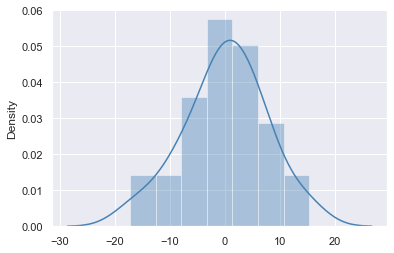

In [32]:
sns.distplot(resid, color = 'steelblue')

<AxesSubplot:ylabel='Density'>

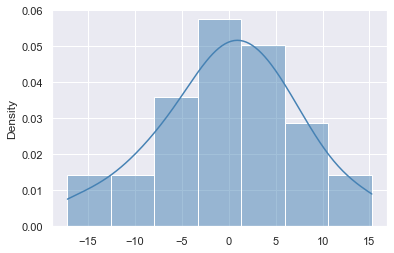

In [33]:
sns.histplot(resid, color = 'steelblue', kde = True, stat = 'density')

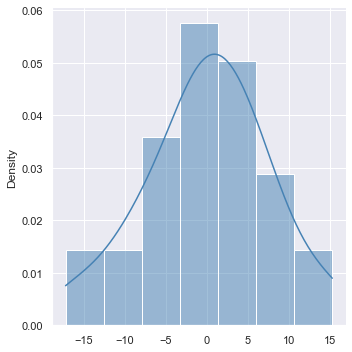

In [34]:
sns.displot(resid, color = 'steelblue', kde = True, stat = 'density')

* 다음에는 X축이 적합도, Y축이 잔차인 산포도를 그림

* 이 산포도가 완전 랜덤이며 상관이 없다는 것을 확인, 더불어 매우 큰 잔차(이상치)가 나오지 않는 것도 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


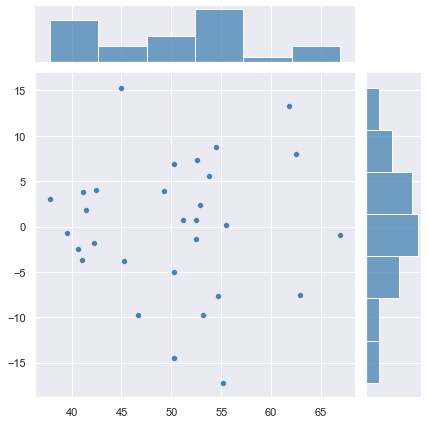

In [35]:
sns.jointplot(lm_model.fittedvalues, resid, joint_kws = {"color" : "steelblue"}, marginal_kws = {"color" : "steelblue"})

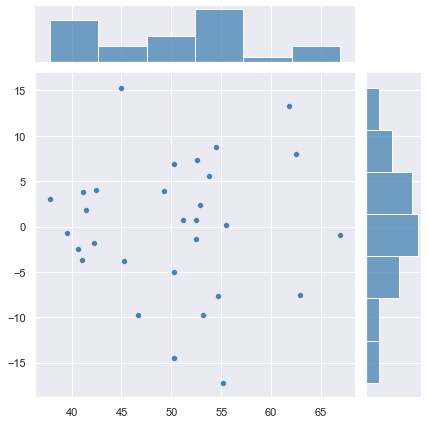

In [36]:
# seaborn의 jointplot의 첫번째 인수는 data(pandas의 DataFrame 또는 numpy의 ndarray)로 각각의 벡터 데이터를 입력하고자 한다면 
# 위치 인수(position argument)로 명시해 주는 것이 좋음(에러 발생 없음)

sns.jointplot(x = lm_model.fittedvalues, y = resid, joint_kws = {"color" : "steelblue"}, marginal_kws = {"color" : "steelblue"})

### 5.1.15 Q-Q 플롯

* **(원리)** 정규분포의 퍼센트 포인트를 사용하면 이론상의 분위점(quantile)을 얻을 수 있고 이론상의 분위점과 실제 데이터의 분위점을 비교

    - 이론상의 분위점과 실제 데이터의 분위점을 비교하는 것으로서 잔차가 정규분포에 근접하는지 아닌지 시각적으로 판단할 수 있음

    - statsmodels.api 의 qqplot을 이용하여 Q-Q 플랏을 그릴 수 있음

        - ```lins = "s"``` 인수를 이용하여 잔차가 정규분포를 따르면 위치하는 기준선(line)을 표시할 수 있음
        

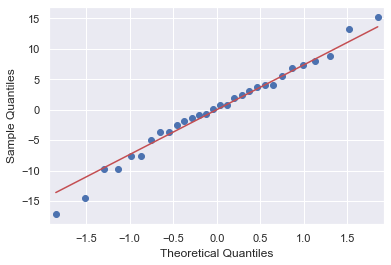

In [37]:
fig = sm.qqplot(resid, line = "s")

In [38]:
# 1. sorting: 우선 데이터를 작은 것이 앞에 오게 끔 정렬함

resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [39]:
# 2. 퍼센트 포인트 시작점(누적확률) 계산 (1/(n(관측치 수)+1))

1/31

0.032

In [40]:
# 3. 30개의 샘플 데이터에 대한 누적확률 계산 (이론상의 누적 확률 산출)

nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [41]:
# 4. 이론상 분위점 계산(정규분포의 퍼센트포인트 이용)

ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

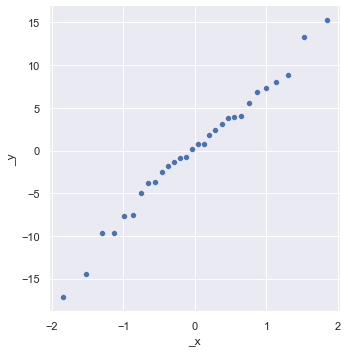

In [42]:
# 5. 산점도를 이용하여 직접 Q-Q plot 그리기

sns.relplot(x = ppf, y = resid_sort)

In [43]:
# 6. Q-Q plot 위에 직접 qqline 그리기

# 6.1 qqline은 Q1과 Q3를 이어주는 선으로 Q1과 Q3의 좌표는 다음과 같이 산출 가능

print("Q1의 좌표: (%3.3f , %3.3f)" %(stats.norm.ppf(0.25), np.quantile(cdf, q = 0.25)))
print("Q3의 좌표: (%3.3f , %3.3f)" %(stats.norm.ppf(0.75), np.quantile(cdf, q = 0.75)))

Q1의 좌표: (-0.674 , 0.266)
Q3의 좌표: (0.674 , 0.734)


In [44]:
# 6.2 qqline의 정의에 따라 q1과 q3을 지나는 선형식(기울기와 절편) 산출
fit_line = np.polyfit(x = [stats.norm.ppf(0.25), stats.norm.ppf(0.75)], 
                      y = [np.quantile(resid_sort, q = 0.25), np.quantile(resid_sort, q = 0.75)], 
                      deg = 1)

print("qqline의 기울기: %3.3f , 절편: %3.3f" %(fit_line[0], fit_line[1])) # 기울기, 절편

qqline의 기울기: 5.765 , 절편: 0.166


In [45]:
# 6.3 qqplot위에 그릴 qqline의 좌표 설정

x_min = np.min(ppf)
x_max = np.max(ppf)

y_min = x_min*fit_line[0] + fit_line[1]
y_max = x_max*fit_line[0] + fit_line[1]

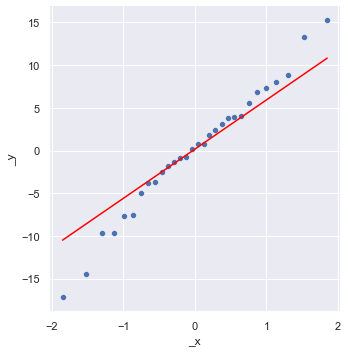

In [46]:
# 6.4 설정된 좌표를 잇는 직선을 추가하여 qqplot 그리기 (plt.plot 이용)
sns.relplot(x = ppf, y = resid_sort)
plt.plot([x_min, x_max], [y_min, y_max], color = "red")

<AxesSubplot:xlabel='_x', ylabel='_y'>

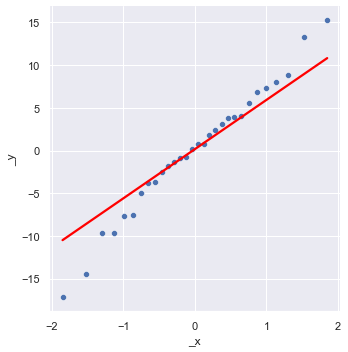

In [47]:
# 6.4 설정된 좌표를 잇는 직선을 추가하여 qqplot 그리기 (sns.regplot 이용)
sns.relplot(x = ppf, y = resid_sort)
sns.regplot(x = [x_min, x_max], y = [y_min, y_max], color = "red", ci= None, scatter = False)

### 5.1.16 summary 함수의 출력으로 보는 잔차 체크

* **Prob(Omnibus)** 와 **Prob(JB)** 는 잔차의 정규성에 대한 검정 결과

    * 귀무가설: 잔차가 정규분포를 따른다.

    * 대립가설: 잔차가 정규분포와 다르다.

    * 검정의 비대칭성이 있으므로 p값이 0.05보다 크다고 해도 정규분포라고 주장할 수 없다는 점에 주의!

    * 이러한 검정은 명확한 문제가 있는지 판단하는 것

* **Skew(왜도)** 히스토그램의 좌우비대칭 방향과 그 정도를 측정하는 지표

    * 0 보다 크면 오른쪽 자락이 길어짐


* **Kurtosis(첨도)** 히스토그램 중심부의 뾰족함을 측정하는 지표

    * 정규분포의 첨조는 3 


* **Durbin-Watson(더빈-왓슨)** : 잔차의 자기상관을 체크하는 지표

    * 0에 가까우면 양의 상관관계, 4에 가까우면 음의 상관관계
    
    * 이 지표가 2 전후라면 문제없다고 판단할 수 있음 (2: 상관관계 없음)

    * 시계열 데이터를 대상으로 분석을 하는 경우에는 반드시 Durbin-watson이 2 전후임을 확인해야 함
    
    * **잔차에 자기상관이 있으면 계수의 t검정 결과를 신뢰할 수 없게 됨**
  

    
    
    

In [48]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        19:15:48   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""